## Business Problem

Being an IT hub, its also a great place for businesses like malls, cinema and recreational places.These have a booming business here as people have no time to cook for themselves amid their busy schedules at work. Thinking of opening a cafe in such a busy place? Ofcourse,Would be a great idea indeed in such a busy place like Bangalore. As Restaurants have such a overwhemling demand, it is important to study the demography of a location . We need to look at different factors that will help in deciding which will be the best location for opening a cafe. We are considering the below factors for trying to address this business problem:

1. Which locations have the best rated Cafes
2. Which locations have potential customers for our Cafe
3. Which locations have very few Cafes
4. Which location has optimal commercial rent and maintenance
5. Which location has closest reach to raw materials and at low cost
6. How many food places are present in each area with more than 3 or 4 rating
7. Which dishes and which cuisine are the best rated across all the Cafes
8. What is the per person cost of the place
9. What are Cafes that are best rated for ambience in each location


## EDA 

In [18]:
!pip install folium
import pandas as pd
import numpy as np
import ast
import re
import math
!pip install geopy
!pip install plotly
from geopy import geocoders
from geopy.geocoders import Nominatim
import requests
from IPython.display import Image 
from IPython.core.display import HTML 
from folium.plugins import FloatImage
from folium.plugins import HeatMap
import folium # plotting library

import matplotlib.pyplot as plt
import seaborn as sns

# Plotly
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly as py
init_notebook_mode(connected=True)
%matplotlib inline

     |████████████████████████████████| 92kB 6.4MB/s eta 0:00:011


In [19]:
# The code was removed by Watson Studio for sharing.

name online_order book_table  \
0                                    San Churro Cafe          Yes         No   
1                                             Onesta          Yes        Yes   
2                                     Penthouse Cafe          Yes         No   
3                                          Smacznego          Yes         No   
4  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes         No   

    rate  votes                             phone      location  \
0  3.8/5    918                    +91 9663487993  Banashankari   
1  4.6/5   2556      080 48653961\r\n080 48655715  Banashankari   
2  4.0/5    324  +91 8884135549\r\n+91 9449449316  Banashankari   
3  4.2/5    504  +91 9945230807\r\n+91 9743804471  Banashankari   
4  4.1/5    402    080 26724489\r\n+91 7406048982  Banashankari   

             rest_type                                         dish_liked  \
0  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
1  Casual Dining, Cafe  Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
2                 Cafe  Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...   
3                 Cafe  Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   
4                 Cafe  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   

                                   cuisines approx_cost(for two people)  
0                    Cafe, Mexican, Italian                         800  
1                      Pizza, Cafe, Italian                         600  
2                Cafe, Italian, Continental                         700  
3  Cafe, Mexican, Italian, Momos, Beverages                         550  
4                                      Cafe                         500

Finding Unique locations where the cafes are located and creating a dataframe 'distnct_loct' with that locations obtained.

In [20]:
distnct_loct=pd.DataFrame(np.unique(df[['location']]))#creating a dataframe with distinct locations of cafe
distnct_loct.columns=['location']#naming the column in dataframe as location.
distnct_loct#displaying the dataframe hence obtained.

location
0                          BTM
1                 Banashankari
2                    Banaswadi
3            Bannerghatta Road
4                 Basavanagudi
5           Basaveshwara Nagar
6                    Bellandur
7                 Bommanahalli
8                 Brigade Road
9                  Brookefield
10              CV Raman Nagar
11               Church Street
12                 City Market
13           Commercial Street
14             Cunningham Road
15                      Domlur
16             Electronic City
17                 Frazer Town
18                  HBR Layout
19                         HSR
20                      Hennur
21  ITPL Main Road, Whitefield
22                 Indiranagar
23               Infantry Road
24                    JP Nagar
25                   Jayanagar
26          Jeevan Bhima Nagar
27               Kaggadasapura
28                Kalyan Nagar
29                Kammanahalli
..                         ...
36       Koramangala 6th Block
37       Koramangala 7th Block
38       Koramangala 8th Block
39          Kumaraswamy Layout
40                Lavelle Road
41                     MG Road
42                Malleshwaram
43                Marathahalli
44                    Nagawara
45                New BEL Road
46            Old Airport Road
47             Old Madras Road
48            Race Course Road
49                 Rajajinagar
50              Residency Road
51               Richmond Road
52              Sadashiv Nagar
53              Sahakara Nagar
54               Sarjapur Road
55               Seshadripuram
56                Shanti Nagar
57                Shivajinagar
58              St. Marks Road
59                Thippasandra
60                      Ulsoor
61               Vasanth Nagar
62                 Vijay Nagar
63                  Whitefield
64               Wilson Garden
65                 Yeshwantpur

[66 rows x 1 columns]

Now we find the latitute and longitudes of the locations obtained in the above dataframe.This is done using 'geopy'

In [23]:
## adding coordinates uisng geopy
from geopy.exc import GeocoderTimedOut
import time

geolocator = Nominatim(user_agent='mya')
for index,row in distnct_loct.iterrows():
    try:
        loc = geolocator.geocode(distnct_loct.loc[index,'location'],timeout=500)
        distnct_loct.loc[index,'lat']=loc.latitude#finding the latitude of the location
        distnct_loct.loc[index,'long']=loc.longitude  #finding the longitude of the location.
        #time.sleep(50)
    except GeocoderTimedOut as e:
        print("Error: geocode failed on input %s with message %s"%(distnct_loctloc[index,'location'], e.message))#exemption message

In [24]:
distnct_loct.head()#displaying the first five rows of the resulatnt dataframe obtained after latitude and longitude addition to it.

location        lat       long
0                BTM  12.911276  77.604565
1       Banashankari  15.887678  75.704678
2          Banaswadi  13.014162  77.651854
3  Bannerghatta Road  12.950501  77.603426
4       Basavanagudi  13.834591  75.733936

In [25]:
distnct_loct.to_csv('loc_coord_nw.csv')
distnct_loct=pd.read_csv('loc_coord_nw.csv')
data=pd.merge(df,distnct_loct,on="location")#forming a new dataframe where the latitute and longitudes of all the locations had been added to it.
data.head(5)#display the first five rows of the resultant dataframe.

name online_order book_table  \
0                                    San Churro Cafe          Yes         No   
1                                             Onesta          Yes        Yes   
2                                     Penthouse Cafe          Yes         No   
3                                          Smacznego          Yes         No   
4  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes         No   

    rate  votes                             phone      location  \
0  3.8/5    918                    +91 9663487993  Banashankari   
1  4.6/5   2556      080 48653961\r\n080 48655715  Banashankari   
2  4.0/5    324  +91 8884135549\r\n+91 9449449316  Banashankari   
3  4.2/5    504  +91 9945230807\r\n+91 9743804471  Banashankari   
4  4.1/5    402    080 26724489\r\n+91 7406048982  Banashankari   

             rest_type                                         dish_liked  \
0  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
1  Casual Dining, Cafe  Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
2                 Cafe  Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...   
3                 Cafe  Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   
4                 Cafe  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   

                                   cuisines approx_cost(for two people)  \
0                    Cafe, Mexican, Italian                         800   
1                      Pizza, Cafe, Italian                         600   
2                Cafe, Italian, Continental                         700   
3  Cafe, Mexican, Italian, Momos, Beverages                         550   
4                                      Cafe                         500   

   Unnamed: 0        lat       long  
0           1  15.887678  75.704678  
1           1  15.887678  75.704678  
2           1  15.887678  75.704678  
3           1  15.887678  75.704678  
4           1  15.887678  75.704678

## EDA 

Getting the number of cafes in different locations.


In [26]:
#getting the  number of cafes by location
d=data.groupby('location')['name'].count()#getting the count of cafes locationwise from the dataframe obtained in the bove segment.
d=pd.DataFrame({'location':d.index, 'counts':d.values}).sort_values(by=['counts'],ascending=False)#Arranging the dataframe in a descending order using sort_values()function.
d.head(20)#display of first 20 rows of the resultant dataframe.

location  counts
35  Koramangala 5th Block     468
22            Indiranagar     327
0                     BTM     320
25              Jayanagar     235
24               JP Nagar     204
41                MG Road     202
19                    HSR     188
60                 Ulsoor     175
34  Koramangala 4th Block     169
37  Koramangala 7th Block     154
11          Church Street     136
63             Whitefield     135
14        Cunningham Road     124
3       Bannerghatta Road     116
1            Banashankari     114
28           Kalyan Nagar     112
8            Brigade Road     111
36  Koramangala 6th Block     109
45           New BEL Road      97
31  Koramangala 1st Block      97

Now Let's find how many of  online orders are bing accepted locationwise.This is done by taking the dataframe 'data'obtained in the last segment and grouping them accordingly.

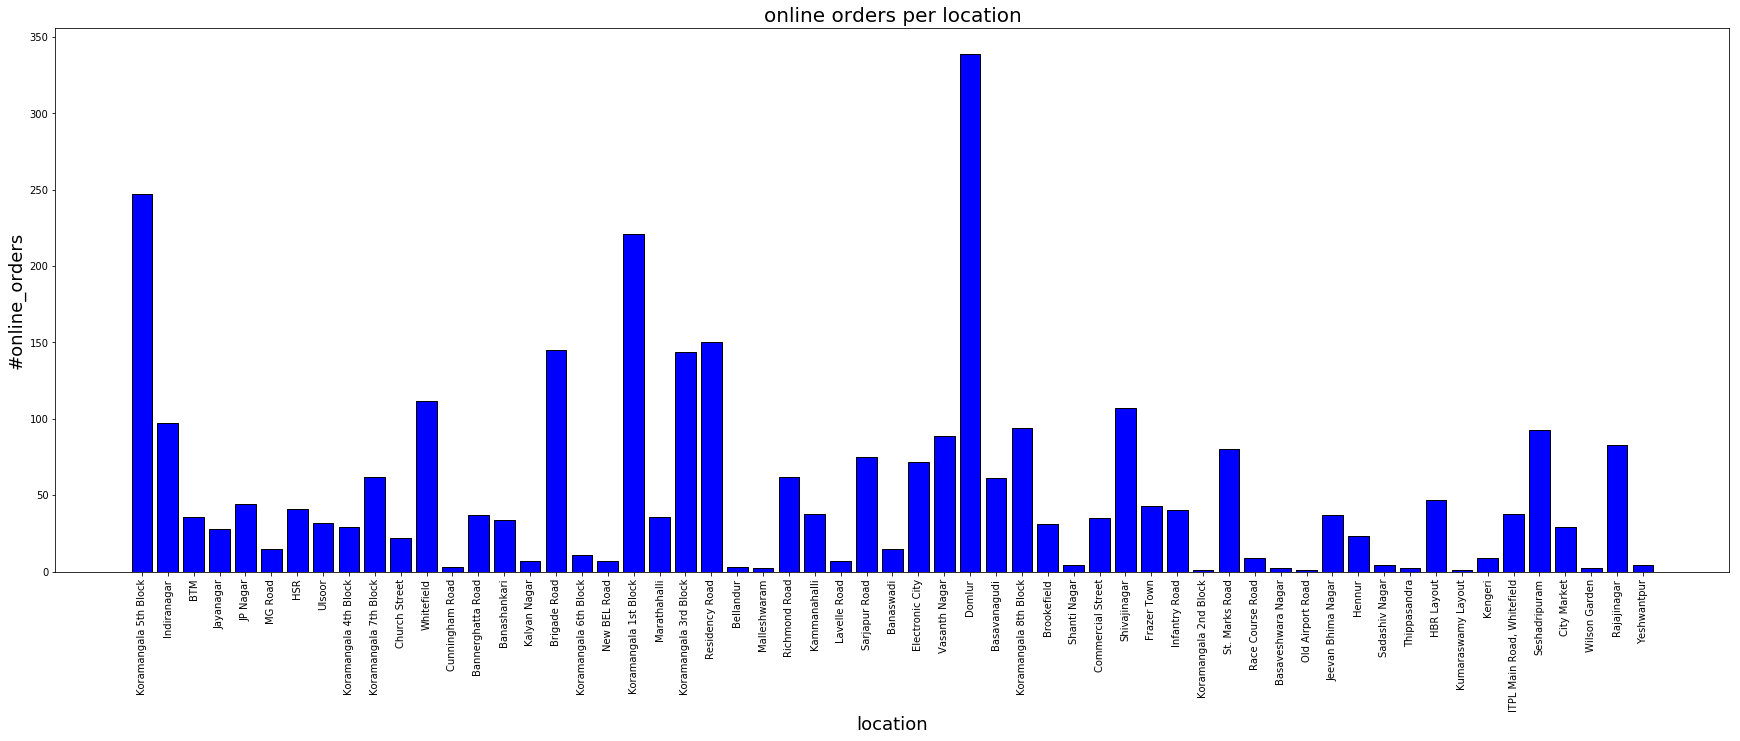

In [31]:
#Finding how many of them accept online orders by location
d_onl=data[data['online_order']=='Yes'].groupby('location')['name'].count()
p=np.arange(len(d_onl))
#plotting a bar grapgh for online orders vs locations.
plt.bar(p,d_onl,color='blue',edgecolor='black')
plt.xticks(p,d.loc[:,'location'],rotation='vertical')
plt.xlabel('location', fontsize=18)
plt.ylabel('#online_orders', fontsize=18)
plt.title('online orders per location',fontsize=20)
#plt.legend(online,loc=2)
plt.rcParams['figure.figsize'] = [30, 20]
plt.show()

Finding the ratings of the cafes location wise by extracting the data from rate column in the dataframe 'data'

In [28]:
#finding the location wise ratings,cafes with 5,4 and 3 rating and their popularity
data.rate.replace(['-', 'NEW'], [0, 0], inplace=True)
data.rate.fillna(0,inplace=True)
data['rate']=data['rate'].apply(lambda x: re.sub("/5","",str(x)))
data.rate.unique()

array(['3.8', '4.6', '4.0', '4.2', '4.1', '3.9', '3.1', '3.0', '3.7',
       '3.6', '3.2', '3.3', '0', '3.4', '3.8 ', '2.8', '3.7 ', '3.9 ',
       '2.6', '4.3', '2.9', '4.3 ', '4.2 ', '4.1 ', '3.5 ', '3.5', '2.5',
       '4.6 ', '4.0 ', '3.4 ', '2.5 ', '3.0 ', '2.9 ', '4.4', '2.7',
       '2.6 ', '2.7 ', '3.3 ', '4.5', '3.1 ', '3.6 ', '4.5 ', '2.8 ',
       '3.2 ', '4.4 ', '4.7', '4.7 ', '2.4', '2.4 ', '2.3'], dtype=object)

In [29]:
data['rate']=data['rate'].apply(lambda x: float(x))

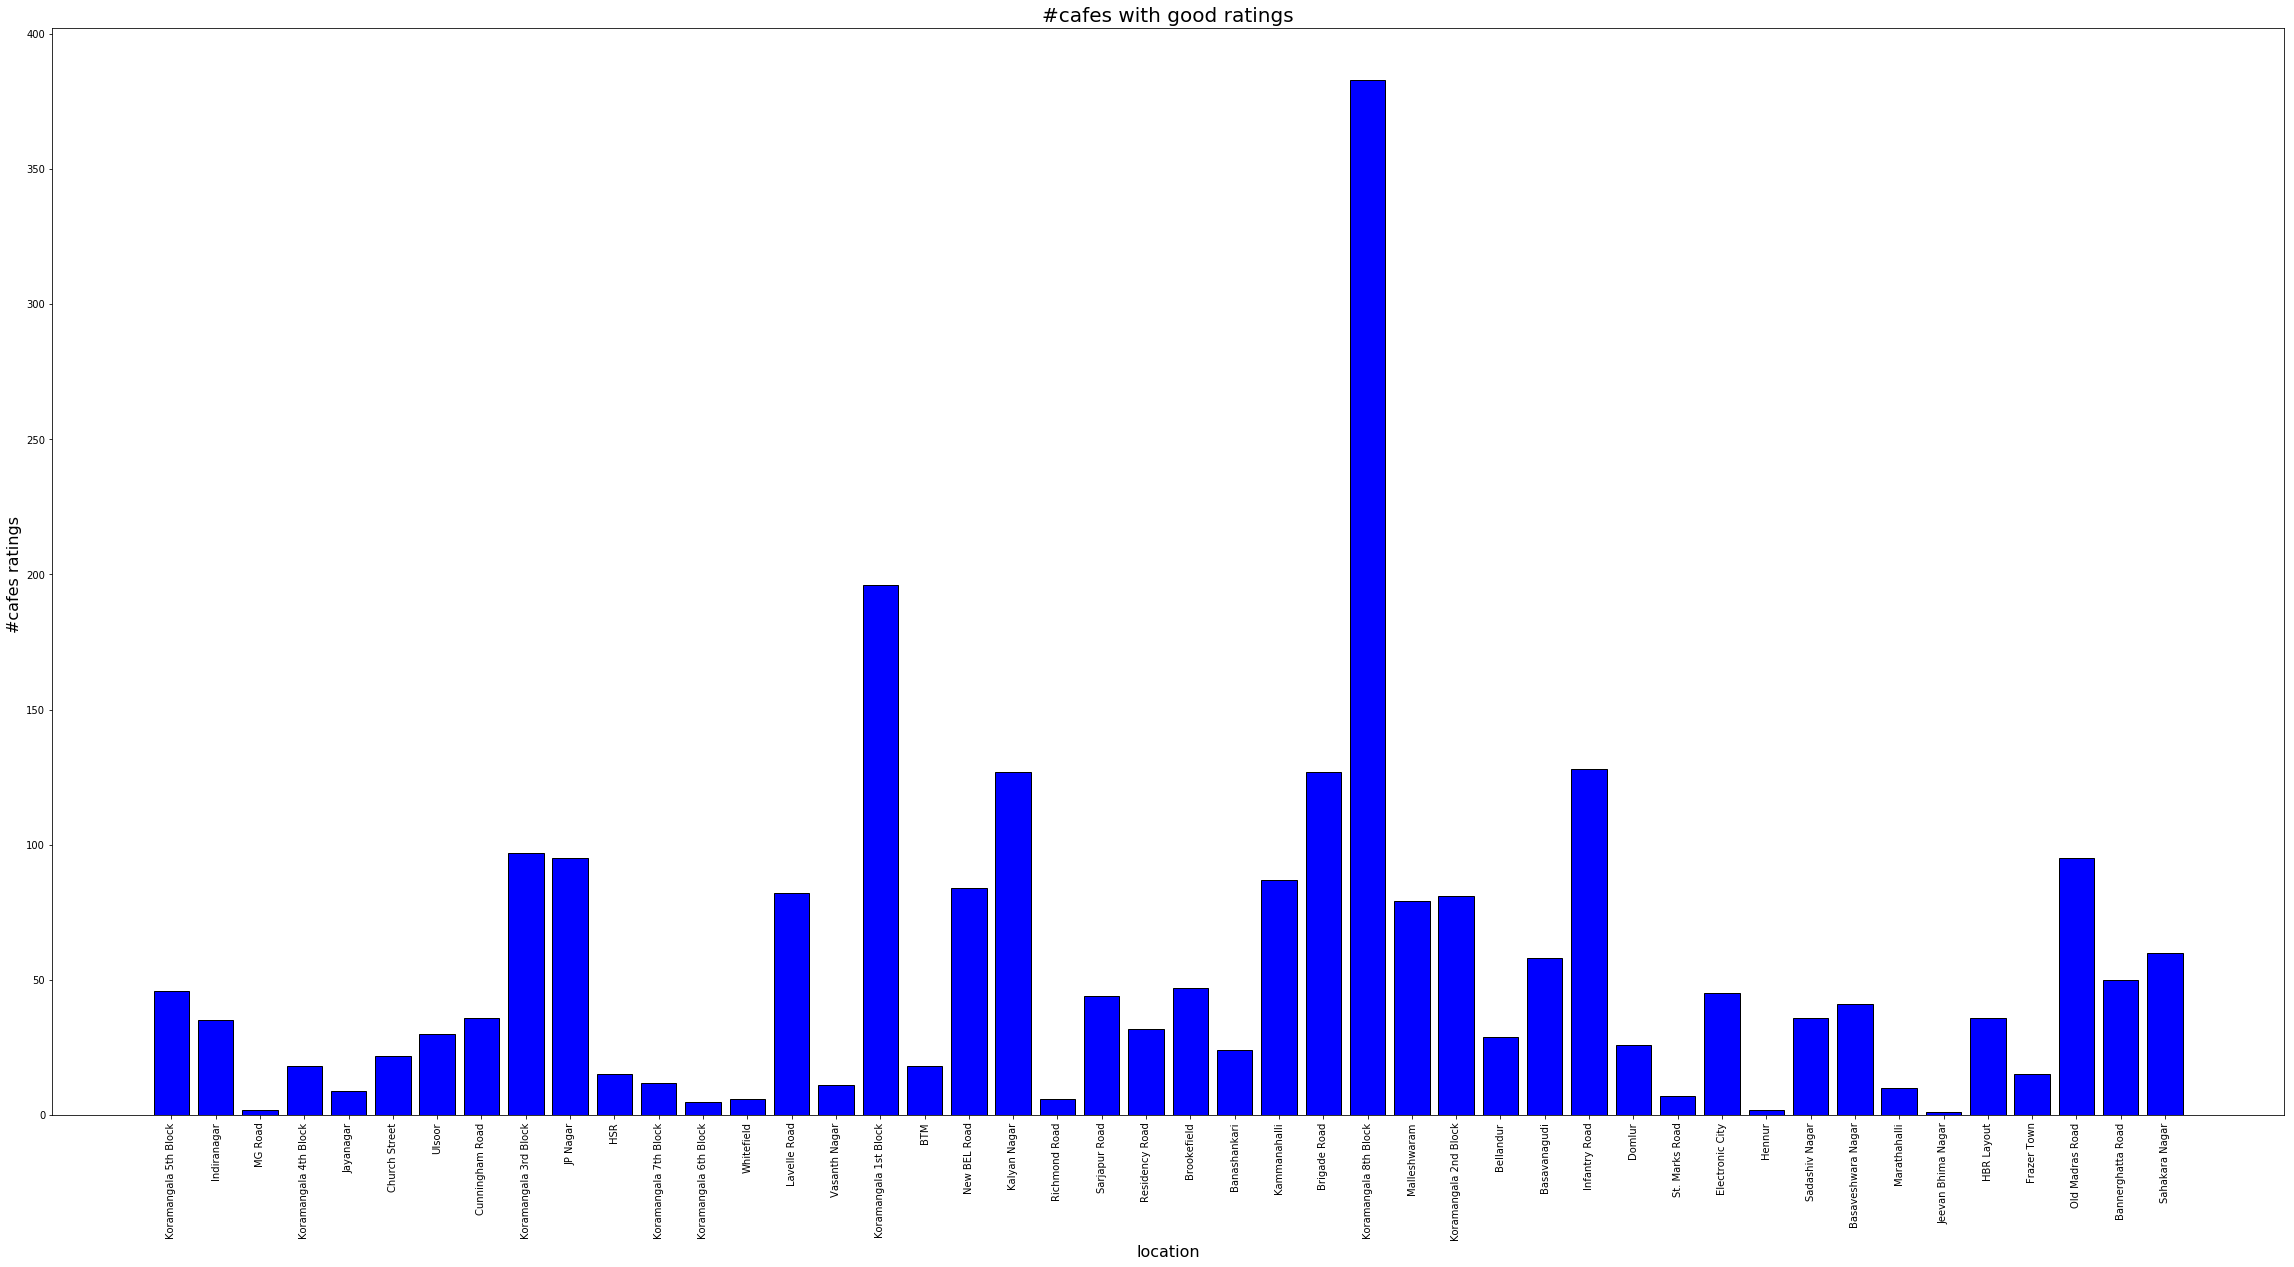

In [30]:
rt_4=data[data['rate']>=4].groupby('location')['name'].count()
dn=rt_4.reset_index()
dn=dn.sort_values(by=['name'],ascending=False)
#plotting the cafe ratings vs locations
p4=np.arange(len(rt_4))
plt.bar(p4,rt_4,color='blue',edgecolor='black')
plt.xticks(p4,dn.loc[:,'location'],rotation='vertical')
plt.xlabel('location', fontsize=16)
plt.ylabel('#cafes ratings ', fontsize=16)
plt.title('#cafes with good ratings',fontsize=20,color='black')
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

In [15]:
m=data[data['rate']>=4].groupby('location')['name'].count()
m=pd.DataFrame({'location':m.index, 'top_cnts':m.values}).sort_values(by=['top_cnts'],ascending=False)
r=pd.merge(m,d,on='location')
r['%top']=(r['top_cnts']/r['counts'])*100
r.sort_values(by=['%top','counts'])

location  top_cnts  counts        %top
44      Bannerghatta Road         2     116    1.724138
39           Marathahalli         7      87    8.045977
42            Frazer Town         5      40   12.500000
17                    BTM        46     320   14.375000
35        Electronic City        12      58   20.689655
26           Brigade Road        30     111   27.027027
30              Bellandur        22      78   28.205128
33                 Domlur        15      51   29.411765
24           Banashankari        35     114   30.701754
28           Malleshwaram        26      73   35.616438
31           Basavanagudi        18      50   36.000000
40     Jeevan Bhima Nagar         6      16   37.500000
19           Kalyan Nagar        44     112   39.285714
9                JP Nagar        84     204   41.176471
10                    HSR        82     188   43.617021
13             Whitefield        60     135   44.444444
22         Residency Road        36      79   45.569620
25           Kammanahalli        32      70   45.714286
18           New BEL Road        45      97   46.391753
38     Basaveshwara Nagar         9      19   47.368421
16  Koramangala 1st Block        47      97   48.453608
45         Sahakara Nagar         1       2   50.000000
32          Infantry Road        18      36   50.000000
11  Koramangala 7th Block        81     154   52.597403
21          Sarjapur Road        36      68   52.941176
4               Jayanagar       127     235   54.042553
6                  Ulsoor        95     175   54.285714
20          Richmond Road        41      71   57.746479
1             Indiranagar       196     327   59.938838
27  Koramangala 8th Block        29      47   61.702128
2                 MG Road       128     202   63.366337
41             HBR Layout         6       9   66.666667
5           Church Street        97     136   71.323529
37         Sadashiv Nagar        10      14   71.428571
12  Koramangala 6th Block        79     109   72.477064
34         St. Marks Road        15      20   75.000000
3   Koramangala 4th Block       127     169   75.147929
23            Brookefield        36      47   76.595745
7         Cunningham Road        95     124   76.612903
36                 Hennur        11      14   78.571429
0   Koramangala 5th Block       383     468   81.837607
14           Lavelle Road        58      69   84.057971
15          Vasanth Nagar        50      55   90.909091
43        Old Madras Road         2       2  100.000000
29  Koramangala 2nd Block        24      24  100.000000
8   Koramangala 3rd Block        87      87  100.000000

Now lets count the different cuisine cafes that are present at each region.

In [32]:
#counting of different cuisine cafes for each region
m=data.groupby(['location','cuisines'])['name'].count()#Finding different cuisines and getting them into a datafame
m=pd.DataFrame(m)
m=m.reset_index()#resetting the indexes of the dataframe
m=m.sort_values(by='name',ascending=False)#arrange the dataframe in descending order
m.head(10)

location                                         cuisines  \
2                      BTM                                             Cafe   
368  Koramangala 5th Block                     Cafe, Continental, Beverages   
427                MG Road                                             Cafe   
125        Cunningham Road  North Indian, Thai, Japanese, Continental, Cafe   
208            Indiranagar                                Cafe, Continental   
87            Brigade Road                                             Cafe   
252               JP Nagar                                             Cafe   
276              Jayanagar                                             Cafe   
337  Koramangala 1st Block                                             Cafe   
13                     BTM                                  Cafe, Fast Food   

     name  
2      68  
368    52  
427    46  
125    34  
208    31  
87     31  
252    30  
276    30  
337    30  
13     29

In [34]:
#finding average rating for each location and cuisine
cus=data.groupby(['location','cuisines'])['rate'].mean()#finding the mean average ratings and form a dataframe with location,cuisines and ratings.
cus=pd.DataFrame(cus)
cus=cus.reset_index()#resetting the indexes of the dataframe
cus=cus.sort_values(by='rate',ascending=False)#arrange them in descending order by rate
cus.head()

location                                           cuisines  \
364  Koramangala 5th Block                      Cafe, American, Burger, Steak   
386  Koramangala 5th Block  Chinese, American, Continental, Italian, North...   
469           New BEL Road                      Cafe, American, Burger, Steak   
125        Cunningham Road    North Indian, Thai, Japanese, Continental, Cafe   
408  Koramangala 7th Block                        Cafe, Desserts, Continental   

         rate  
364  4.700000  
386  4.700000  
469  4.700000  
125  4.688235  
408  4.615789

In [35]:
#finding people votes/popularity of the cafe:
a=data.loc[:, data.columns.isin(['location','name','votes'])].groupby(['location','name'])['votes'].max()#making a dataframe with location,name of the cafe and the number of votes given by the customers.
a=a.reset_index()
a.sort_values(by='votes',ascending=False)#arrange the dataframe in the descending order of the votes with highest voted cafe at the top.

location                                             name  \
459  Koramangala 5th Block                                         Truffles   
421  Koramangala 4th Block                                           Onesta   
427  Koramangala 4th Block                        The Hole in the Wall Cafe   
261            Indiranagar                                 Glen's Bakehouse   
572           New BEL Road                                           Onesta   
146        Cunningham Road                                         Hammered   
274            Indiranagar                                           Onesta   
314               JP Nagar                                           Onesta   
581           New BEL Road                                         Truffles   
209                    HSR                                           Onesta   
444  Koramangala 5th Block                                     Dyu Art Cafe   
499           Lavelle Road                          Soda Bottle Opener Wala   
640         St. Marks Road                                         Truffles   
135          Church Street                              Smally's Resto Cafe   
445  Koramangala 5th Block                               ECHOES Koramangala   
398  Koramangala 1st Block                                       Cafe Thulp   
568           New BEL Road                                         Hammered   
550           Marathahalli                                           Onesta   
430  Koramangala 5th Block                           A Hole Lotta Love Cafe   
594         Residency Road                                     Green Theory   
502                MG Road                                      Cafe Azzure   
451  Koramangala 5th Block                                     Om Made Cafe   
409  Koramangala 3rd Block                            Mr. Beans - Home Cafe   
281            Indiranagar                                           Stoner   
456  Koramangala 5th Block                                           Stoner   
133          Church Street                                    Matteo Coffea   
390           Kammanahalli                                           Onesta   
41            Banashankari                                           Onesta   
463  Koramangala 6th Block                                           Bundar   
130          Church Street                                        Brik Oven   
..                     ...                                              ...   
523           Malleshwaram                                   Kaffee Klatsch   
275            Indiranagar                                   Planet Popcorn   
364           Kalyan Nagar                                    Bunty's Belly   
118           Brigade Road                                       X-tra Cafe   
259            Indiranagar                                    Fog City Cafe   
143      Commercial Street                             The Chocolate Heaven   
237            Indiranagar                                        Brik Oven   
604          Richmond Road  Third Wave Coffee Roasters @ The Bohemian House   
134          Church Street                                            Rasta   
537           Marathahalli                                          Cafe 19   
633           Shanti Nagar                                           X Cafe   
148        Cunningham Road              Irene's Cafe & Deli - Citrus Hotels   
543           Marathahalli                                     Chef Baker's   
546           Marathahalli                                        Desi Chai   
357     Jeevan Bhima Nagar                                      Chaai Resto   
60               Banaswadi                                          XO Cafe   
68       Bannerghatta Road                                      Cafe Conico   
653                 Ulsoor               The Corner - Hyatt Centric MG Road   
229                 Hennur                   Cafe Bakery Morning Cal

In [37]:
#expense of restaurant wrt rating and vote
s=data.loc[:, data.columns.isin(['location','name','approx_cost(for two people)'])]
s['cost']=s['approx_cost(for two people)'].apply(lambda x: float(re.sub(",", "",str(x))))
s=s.groupby(['location','name'])['cost'].mean()
s=s.reset_index()
s.sort_values(by='cost',ascending=False)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



location                                               name  \
505                MG Road                Cafe Mozaic - Taj MG Road Bengaluru   
654                 Ulsoor                  The Lobby Brew - Conrad Bengaluru   
663          Vasanth Nagar                The Lobby Lounge - Shangri-La Hotel   
674             Whitefield                                       Cafe Palmyra   
507                MG Road  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...   
508                MG Road          CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Felix   
506                MG Road  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...   
154                 Domlur                                          Loveshack   
678             Whitefield                                   Enchanted Garden   
494           Lavelle Road   Bengaluru Baking Company - JW Marriott Bengaluru   
242            Indiranagar                                           Cafe Max   
499           Lavelle Road                            Soda Bottle Opener Wala   
451  Koramangala 5th Block                                       Om Made Cafe   
146        Cunningham Road                                           Hammered   
190                    HSR                                     Brimstone Cafe   
365           Kalyan Nagar                                        Cafe Azzure   
568           New BEL Road                                           Hammered   
433  Koramangala 5th Block                                         Bistro Oui   
502                MG Road                                        Cafe Azzure   
446  Koramangala 5th Block                                Fresh Pressery Cafe   
497           Lavelle Road                                Fresh Pressery Cafe   
201                    HSR                                          Grapevine   
180            Frazer Town                                        Mambos Cafe   
252            Indiranagar                                         Crisp Cafe   
659          Vasanth Nagar                                             BanBay   
686             Whitefield                                              Orzuv   
496           Lavelle Road                         Cafe Coffee Day The Square   
579           New BEL Road                                        THE BEL ST.   
662          Vasanth Nagar                                     The Culinarium   
130          Church Street                                          Brik Oven   
..                     ...                                                ...   
564           New BEL Road                                Chaiywaala Da Dhaba   
186                    HSR                                      5th Main Cafe   
140            City Market                                          Talk Ease   
9                      BTM                                       Cafe Longing   
11                     BTM                                           Chillout   
246            Indiranagar                                          Chai Cafe   
20                     BTM                                        Kullad Cafe   
247            Indiranagar                                          Chai Days   
36            Banashankari                                       Coffee Tindi   
403  Koramangala 2nd Block                                      Fabindia Cafe   
532           Malleshwaram                                     Tea Samskruthi   
275            Indiranagar                                     Planet Popcorn   
122            Brookefield                                        Chaai Resto   
514                MG Road                                       Little Bites   
615          Sarjapur Road                                        Chaai Resto   
592         Residency Road                                  Dad's Coffee Club   
357     Jeevan Bhima Nagar                                        Chaai Resto   
185             HBR Layout    KafÃÂÃÂÃÂÃÂ

In [38]:
#to understand if our cafes expense will suit the location avg rating and popularity
new=pd.merge(s,a,on=['location','name'])
new.sort_values(by=['votes','cost'],ascending=False).head()

location                       name   cost  votes
459  Koramangala 5th Block                   Truffles  900.0  14726
421  Koramangala 4th Block                     Onesta  600.0   9085
427  Koramangala 4th Block  The Hole in the Wall Cafe  600.0   7137
261            Indiranagar           Glen's Bakehouse  600.0   5352
572           New BEL Road                     Onesta  600.0   4897

In [36]:
#visualizing current location cafes
address = 'bengaluru'
geolocator = Nominatim(user_agent="Osmows_project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_rs= folium.Map(location=[latitude, longitude], zoom_start='12')
folium.Marker([latitude, longitude], popup='Epicenter').add_to(map_rs)
for lat, lng,location in zip(data['lat'], data['long'],
                                            data['location']):
    label = 'Venue Name: {} '.format(location)
    label = folium.Popup(label, parse_html=True)
    color = 'red'
        
    folium.CircleMarker(
        [lat, lng], radius=5, popup=label, color=color,
        fill=True, fill_color='#3186cc', fill_opacity=0.7).add_to(map_rs)
# venues_df['VenueLatitude'] = venues_df['VenueLatitude'].astype(float)
# venues_df['VenueLongitude'] = venues_df['VenueLongitude'].astype(float)
heat_df = data[['lat', 'long']]
heat_df = data.dropna(axis=0, subset=['lat','long'])
heat_data = [[row['lat'],row['long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data).add_to(map_rs)
map_rs

In [39]:
#nearby restraunts for each of the location suing foursquare API for locations 
CLIENT_ID = 'PNS2VU2KJ2HY52SFUMVBWLGTXFOZHSNSRDMZR3VLOLQRURHK' # your Foursquare ID
CLIENT_SECRET = 'F4TRB2XTO12CZBHJTTWWHKPVJPIKO45GPCKCCTM31XA3PZ5G' # your Foursquare Secret
VERSION = '20180604'

In [41]:
radius = 500
LIMIT = 100
venues = []
for lat, long,location in zip(distnct_loct['lat'],distnct_loct['long'],distnct_loct['location']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, long, radius, LIMIT)
    results = requests.get(url).json()["response"]['groups'][0]['items']
    #print(results)
    for venue in results:
        venues.append((lat, long,location,venue['venue']['name'], 
        venue['venue']['location']['lat'], venue['venue']['location']['lng'],  
        venue['venue']['categories'][0]['name'],venue['venue']['location']['distance']))

In [42]:
venues_df = pd.DataFrame(venues)
venues_df.head(20)
venues_df.columns = ['lat', 'long','location', 'VenueName', 'VenueLatitude', 'VenueLongitude','VenueCategory', 'VenueDistance']

In [26]:
print('Total there are {} uniques Venues categories.'.format(len(venues_df['VenueCategory'].unique())))
print('List of first 20 venues categories:', venues_df['VenueCategory'].unique()[:10])

Total there are 174 uniques Venues categories.
List of first 20 venues categories: ['Bakery' 'Department Store' 'Café' 'Chinese Restaurant' 'Ice Cream Shop'
 'Vegetarian / Vegan Restaurant' 'Snack Place' 'Fast Food Restaurant'
 'Dumpling Restaurant' 'Indian Restaurant']


In [43]:
unique_venues_list = list(venues_df.VenueCategory.unique())
unique_restaurants_list = []
for x in unique_venues_list:
    if 'restaurant' in x.lower():
        unique_restaurants_list.append(x)

unique_restaurants_list
print('There are {} uniques restaurant categories.'.format(len(unique_restaurants_list)))
print(unique_restaurants_list[:10])

There are 43 uniques restaurant categories.
['Chinese Restaurant', 'Vegetarian / Vegan Restaurant', 'Fast Food Restaurant', 'Dumpling Restaurant', 'Indian Restaurant', 'Restaurant', 'Kerala Restaurant', 'Andhra Restaurant', 'Modern European Restaurant', 'Thai Restaurant']


In [44]:
venues_df=pd.DataFrame(venues_df[venues_df['VenueCategory'].isin(unique_restaurants_list)].reset_index(drop=True))

In [45]:
address = 'bengaluru'
geolocator = Nominatim(user_agent="Osmows_project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [46]:
map_rs= folium.Map(location=[latitude, longitude], zoom_start='12')
folium.Marker([latitude, longitude], popup='Epicenter').add_to(map_rs)
for lat, lng, VenueName, VenueCategory in zip(venues_df['VenueLatitude'], venues_df['VenueLongitude'],
                                            venues_df['VenueName'], venues_df['VenueCategory']):
    label = 'Venue Name: {} |Venue Category: {} '.format(VenueName, VenueCategory)
    label = folium.Popup(label, parse_html=True)
    color = 'blue'
        
    folium.CircleMarker(
        [lat, lng], radius=5, popup=label, color=color,
        fill=True, fill_color='#3186cc', fill_opacity=0.7).add_to(map_rs)
venues_df['VenueLatitude'] = venues_df['VenueLatitude'].astype(float)
venues_df['VenueLongitude'] = venues_df['VenueLongitude'].astype(float)
heat_df = venues_df[['VenueLatitude', 'VenueLongitude']]
heat_df = venues_df.dropna(axis=0, subset=['VenueLatitude','VenueLongitude'])
heat_data = [[row['VenueLatitude'],row['VenueLongitude']] for index, row in heat_df.iterrows()]
HeatMap(heat_data).add_to(map_rs)
map_rs

## Insights/Recommendations



Starting with locations where most people visit and those where high rated are few, so that there is low competetion are New BEL road JP Nagar and HSR. howver, looking at #cafes around HSR has many around,as compared to New BEL road. But if you want to be open for online ordering service as well, then HSR is better. So based on your budget either of the locations will be good, with two person cost around 600-900.


## Conclusion

Although analysisng different restraunts data can help in this analysis, factors like age group, economy of the location will be affecting the real world scenario. however, condiering different factors mentioned above,conclusion is that opening a new Cafe in HSR would be a best option